In [144]:
import pandas as pd
import numpy as np
import scipy.io
import math
from collections import Counter
import copy
import warnings
import tensorflow 
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
warnings.filterwarnings("ignore")
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]
def rms(arr):
    n = len(arr)
    squared = np.array(arr) * np.array(arr)
    sum = np.sum(squared)
    mean = (sum / (float)(n))
    root = math.sqrt(mean)
    return root
def mav(arr):
    n = len(arr)
    mav = sum((abs(np.array(arr))))/(float)(n)
    return mav
def var(arr):
    n = len(arr)
    squared = np.array(arr) * np.array(arr)
    sum = np.sum(squared)
    result = (sum / (float)(n))
    return result
def wl(arr):
    n = len(arr)
    sum = 0
    for i in range(1, n):
        sum += abs(arr[i] - arr[i - 1])
    return sum
def iav(arr):
    return sum(abs(np.array(arr)))
def mean(arr):
    return np.sum(arr)/len(arr)
def pretty(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):

            pretty(value, indent + 2)
            print('-----------------------')
        else:
            print('\t' * (indent + 2) + str(value))
            print(" ")
def consecutive(data, stepsize=1):
    return np.split(data, np.where(np.diff(data) != stepsize)[0] + 1)
def extractSubject(name):
    ex1Path = 'DB1/' + name + '/' + name + '_A1_E1.mat'
    print(ex1Path)
    ex1 = scipy.io.loadmat(ex1Path)
    emg = ex1['emg']
    EMGdf = pd.DataFrame.from_dict(emg)
    stimulus = ex1['restimulus']

    ex2Path = 'DB1/' + name + '/' + name + '_A1_E2.mat'
    ex2 = scipy.io.loadmat(ex2Path)
    emg2 = ex2['emg']
    EMGdf2 = pd.DataFrame.from_dict(emg2)
    stimulus2 = ex2['restimulus']

    ex3Path = 'DB1/' + name + '/' + name + '_A1_E3.mat'
    ex3 = scipy.io.loadmat(ex3Path)
    emg3 = ex3['emg']
    EMGdf3 = pd.DataFrame.from_dict(emg3)
    stimulus3 = ex3['restimulus']

    Movements = {}
    for m in range(1, 51):
        if (m < 11):
            movementIndices = np.where(stimulus == m)[0]
            repetitions = consecutive(movementIndices)
            EMG = EMGdf
        elif (m < 28):
            movementIndices = np.where(stimulus2 == (m - 10))[0]
            repetitions = consecutive(movementIndices)
            EMG = EMGdf2
        else:
            movementIndices = np.where(stimulus3 == (m - 27))[0]
            repetitions = consecutive(movementIndices)
            EMG = EMGdf3

        Electrodes = {}
        for e in range(1, 11):
            temp = {}
            for r in range(1, 7):
                startIndex = repetitions[r - 1][0]
                LastIndex = repetitions[r - 1][len(repetitions[r - 1]) - 1]
                df = EMG.iloc[startIndex:LastIndex, e - 1]
                df.reset_index(drop=True, inplace=True)
                narray = df.to_numpy(dtype=None, copy=False)
                temp["R{0}".format(r)] = narray
            Electrodes["Electrode{0}".format(e)] = temp
        Movements["Movement{0}".format(m)] = Electrodes
    return Movements
def extractSubjectAngles(name):
    ex1Path = 'Kinematics/' + name + '/' + name + '_E1_A1.mat'
    print(ex1Path)
    ex1 = scipy.io.loadmat(ex1Path)
    angles1 = ex1['angles']
    anglesDF1 = pd.DataFrame.from_dict(angles1)
    stimulus = ex1['restimulus']

    ex2Path = 'Kinematics/' + name + '/' + name + '_E2_A1.mat'
    ex2 = scipy.io.loadmat(ex2Path)
    angles2 = ex2['angles']
    anglesDF2 = pd.DataFrame.from_dict(angles2)
    stimulus2 = ex2['restimulus']

    ex3Path = 'Kinematics/' + name + '/' + name + '_E3_A1.mat'
    ex3 = scipy.io.loadmat(ex3Path)
    angles3 = ex3['angles']
    anglesDF3 = pd.DataFrame.from_dict(angles3)
    stimulus3 = ex3['restimulus']

    Movements = {}
    for m in range(1, 51):
        if (m < 11):
            movementIndices = np.where(stimulus == m)[0]
            repetitions = consecutive(movementIndices)
            angle = anglesDF1
        elif (m < 28):
            movementIndices = np.where(stimulus2 == (m - 10))[0]
            repetitions = consecutive(movementIndices)
            angle = anglesDF2
        else:
            movementIndices = np.where(stimulus3 == (m - 27))[0]
            repetitions = consecutive(movementIndices)
            angle = anglesDF3

        Angles = {}
        for a in range(1,23):
            if a == 6:
               Angles["Angle6"] = ""
               continue

            temp={}
            for r in range(1, 7):
                startIndex = repetitions[r - 1][0]
                LastIndex = repetitions[r - 1][len(repetitions[r - 1]) - 1]
                df = angle.iloc[startIndex:LastIndex, a-1]
                df.reset_index(drop=True, inplace=True)
                narray = df.to_numpy(dtype=None, copy=False)
                temp["R{0}".format(r)] = narray
            Angles["Angle{0}".format(a)] = temp
        Movements["Movement{0}".format(m)] = Angles

    return Movements


In [132]:
final_df = pd.DataFrame(columns={'RMS1', 'MAV1', 'VAR1', 'WL1', 'IAV1',
                                 'RMS2', 'MAV2', 'VAR2', 'WL2', 'IAV2',
                                 'RMS3', 'MAV3', 'VAR3', 'WL3', 'IAV3',
                                 'RMS4', 'MAV4', 'VAR4', 'WL4', 'IAV4',
                                 'RMS5', 'MAV5', 'VAR5', 'WL5', 'IAV5',
                                 'RMS6', 'MAV6', 'VAR6', 'WL6', 'IAV6',
                                 'RMS7', 'MAV7', 'VAR7', 'WL7', 'IAV7',
                                 'RMS8', 'MAV8', 'VAR8', 'WL8', 'IAV8',
                                 'RMS9', 'MAV9', 'VAR9', 'WL9', 'IAV9',
                                 'RMS10', 'MAV10', 'VAR10', 'WL10', 'IAV10',
                                 'Train'})
final_df_angle = pd.DataFrame(columns={})
df_angle = pd.DataFrame(columns={})
i=0
for s in range(1,8):
    subject = 'S' + str(s)
    df_angles = pd.DataFrame.from_dict(extractSubjectAngles(subject))
    for m in range(1,51):
        M = df_angles['Movement'+str(m)]
        start = copy.deepcopy(i)
        for a in range (1,23):
            if a==6:
                continue

            Angles = M['Angle' +str(a)]
            for r in range(1,7):
                rep = "R" + str(r)
                for x in range(0, len(Angles[rep]), 48):
                    df_angle.at[i, a-1] = mean(Angles[rep][x:x + 50])
                    i += 1
            if a != 22:
                i = copy.deepcopy(start)
    final_df_angle = final_df_angle.append(df_angle, ignore_index=True)            

Kinematics/S1/S1_E1_A1.mat
Kinematics/S2/S2_E1_A1.mat
Kinematics/S3/S3_E1_A1.mat
Kinematics/S4/S4_E1_A1.mat
Kinematics/S5/S5_E1_A1.mat
Kinematics/S6/S6_E1_A1.mat
Kinematics/S7/S7_E1_A1.mat


In [133]:
for s in range(1,8):
    subject = 'S' + str(s)
    dff = pd.DataFrame.from_dict(extractSubject(subject))
    df = pd.DataFrame(columns={'RMS1', 'MAV1', 'VAR1', 'WL1', 'IAV1',
                           'RMS2', 'MAV2', 'VAR2', 'WL2', 'IAV2',
                           'RMS3', 'MAV3', 'VAR3', 'WL3', 'IAV3',
                           'RMS4', 'MAV4', 'VAR4', 'WL4', 'IAV4',
                           'RMS5', 'MAV5', 'VAR5', 'WL5', 'IAV5',
                           'RMS6', 'MAV6', 'VAR6', 'WL6', 'IAV6',
                           'RMS7', 'MAV7', 'VAR7', 'WL7', 'IAV7',
                           'RMS8', 'MAV8', 'VAR8', 'WL8', 'IAV8',
                           'RMS9', 'MAV9', 'VAR9', 'WL9', 'IAV9',
                           'RMS10', 'MAV10', 'VAR10', 'WL10', 'IAV10',
                           'Train'})
    for e in range(1, 11):
        electrode = 'Electrode' + str(e)
        i=0
        for m in range(1,51):
            M = dff['Movement'+str(m)][electrode]
            for r in range(1, 7):
                rep = "R" + str(r)
                if (r in [1, 3, 4, 6]):
                    train = 1
                else:
                    train = 0
                for x in range(0, len(M[rep]), 48):
                    df.at[i, 'RMS' + str(e)] = rms(M[rep][x:x + 50])
                    df.at[i, 'MAV' + str(e)] = mav(M[rep][x:x + 50])
                    df.at[i, 'VAR' + str(e)] = var(M[rep][x:x + 50])
                    df.at[i, 'WL' + str(e)] = wl(M[rep][x:x + 50])
                    df.at[i, 'IAV' + str(e)] = iav(M[rep][x:x + 50])
                    df.at[i, 'Train'] = train
                    i += 1
    final_df = final_df.append(df, ignore_index=True)

DB1/S1/S1_A1_E1.mat
DB1/S2/S2_A1_E1.mat
DB1/S3/S3_A1_E1.mat
DB1/S4/S4_A1_E1.mat
DB1/S5/S5_A1_E1.mat
DB1/S6/S6_A1_E1.mat
DB1/S7/S7_A1_E1.mat


In [134]:
final_df['CMC1_f'] = df_angle[0]
final_df['CMC1_a'] =  df_angle[1]
final_df['MCP1'] =  df_angle[2]
final_df['IP1'] =  df_angle[3]
final_df['MCP2_f'] =  df_angle[4]
final_df['PIP2'] =  df_angle[6]
final_df['MCP3_f'] =  df_angle[7]
final_df['PIP3'] =  df_angle[8]
final_df['MCP4_f'] =  df_angle[9]
final_df['MCP4_a'] =  df_angle[10]
final_df['PIP4'] =  df_angle[11]
final_df['CMC5'] =  df_angle[12]
# final_df['MCP5_f'] =  df_angle[13]
final_df['MCP5_a'] =  df_angle[14]
final_df['PIP5'] =  df_angle[15]
final_df['DIP2'] =  df_angle[16]
final_df['DIP3'] =  df_angle[17]
final_df['DIP4'] =  df_angle[18]
final_df['DIP5'] =  df_angle[19]
# final_df['WRIST_F'] =  df_angle[20]
# final_df['WRIST_A'] =  df_angle[21]

features = {
            'RMS1', 'MAV1', 'VAR1', 'WL1', 'IAV1',
            'RMS2', 'MAV2', 'VAR2', 'WL2', 'IAV2',
            'RMS3', 'MAV3', 'VAR3', 'WL3', 'IAV3',
            'RMS4', 'MAV4', 'VAR4', 'WL4', 'IAV4',
            'RMS5', 'MAV5', 'VAR5', 'WL5', 'IAV5',
            'RMS6', 'MAV6', 'VAR6', 'WL6', 'IAV6',
            'RMS7', 'MAV7', 'VAR7', 'WL7', 'IAV7',
            'RMS8', 'MAV8', 'VAR8', 'WL8', 'IAV8',
            'RMS9', 'MAV9', 'VAR9', 'WL9', 'IAV9',
            'RMS10', 'MAV10', 'VAR10', 'WL10', 'IAV10' }

angles = {'CMC1_f','CMC1_a','MCP1','IP1','MCP2_f',
        'PIP2','MCP3_f','MCP4_f','MCP4_a',
        'PIP4','CMC5','MCP5_a','PIP5',
        'DIP2','DIP4','DIP5', 'DIP3', 'PIP3'}

print(final_df)

          WL5      MAV8     WL2      IAV8     IAV9      MAV2      RMS2  \
0       0.005  0.053168   0.696    2.6584   2.0183  0.061522  0.078694   
1       0.059  0.084324  0.4956    4.2162   2.5488  0.083688  0.091641   
2      0.0246  0.062058  0.0707    3.1029   1.0291  0.008616  0.014363   
3       0.015   0.03213     0.0    1.6065    0.516    0.0024    0.0024   
4       0.005   0.04868     0.0     2.434   1.3248    0.0024    0.0024   
...       ...       ...     ...       ...      ...       ...       ...   
17733  0.8326   2.00957  3.6936  100.4785  14.3286  1.172076  1.209477   
17734  0.4327  1.587306  1.6044   79.3653  13.3323  0.914552  0.926478   
17735  0.4077  1.229004  1.8068   61.4502  12.2362  0.759278  0.812581   
17736  0.4126  0.731154  1.3185   36.5577  14.1751   0.30967  0.328649   
17737  0.3051  0.528487  0.0293    7.9273   1.9212   0.11654  0.116953   

           RMS6      MAV3     IAV10  ...     MCP4_f     MCP4_a       PIP4  \
0        0.0024  0.021462    0.311

In [140]:
X_train = final_df[final_df['Train'] == 1].loc[:, features]
scalar =  StandardScaler()
scalar = scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = final_df[final_df['Train'] == 0].loc[:, features]
X_test = scalar.transform(X_test)

y_train = final_df[final_df['Train'] == 1].loc[:, angles]
y_test = final_df[final_df['Train'] == 0].loc[:, angles]
y_test.to_csv('angles_y_test.csv')



In [150]:
input = Input(shape =(50,))
L1 = Dense(500, activation='tanh')(input)
L2 = Dense(500, activation='sigmoid')(L1)
# L3 = Dense(100, activation='sigmoid')(L2)
ouput = Dense(19, activation='linear')(L2)
model = Model(input, ouput)
model.compile(optimizer=Adam(learning_rate=0.002), loss="mean_squared_error", metrics=['mae', 'mse'])
model.fit(X_train, y_train, epochs=1000)
print(model.evaluate(X_test, y_test))





            PIP4       DIP3       PIP5        PIP2     CMC1_f        IP1  \
7     -13.400148  23.288225  15.290323   97.888164   5.965761  12.451081   
8     -13.400148  38.305761  14.864331  108.316722   7.667273  11.345115   
9     -13.400148  38.060615  14.399263  108.426868   6.662064  11.324936   
10    -13.400148  38.024652  14.399263  107.268637   6.542429  11.324936   
11    -13.400148  38.748697  14.399263  107.162486   6.663109  11.346815   
...          ...        ...        ...         ...        ...        ...   
17722  -4.211233 -36.182578   6.998763   90.577818  24.340685   7.820865   
17723  -4.565887 -36.182578   6.772859   90.037647  23.602029   8.245594   
17724  -4.548531 -35.254567   6.564457   89.669244  22.318560   9.293457   
17725  -5.169424 -32.762774   6.021607   88.471819  21.156327   9.959904   
17726  -9.653457  -7.792504   5.953375   66.812788  15.259207  15.903173   

          MCP4_f      CMC5       PIP3       DIP5    CMC1_a     MCP2_f  \
7      10.2729

ValueError: in user code:

    File "/Users/alaaabdelazeem/miniforge3/envs/tensorflow/lib/python3.8/site-packages/keras/engine/training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "/Users/alaaabdelazeem/miniforge3/envs/tensorflow/lib/python3.8/site-packages/keras/engine/training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/alaaabdelazeem/miniforge3/envs/tensorflow/lib/python3.8/site-packages/keras/engine/training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "/Users/alaaabdelazeem/miniforge3/envs/tensorflow/lib/python3.8/site-packages/keras/engine/training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/alaaabdelazeem/miniforge3/envs/tensorflow/lib/python3.8/site-packages/keras/engine/training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "/Users/alaaabdelazeem/miniforge3/envs/tensorflow/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/alaaabdelazeem/miniforge3/envs/tensorflow/lib/python3.8/site-packages/keras/losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "/Users/alaaabdelazeem/miniforge3/envs/tensorflow/lib/python3.8/site-packages/keras/losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/alaaabdelazeem/miniforge3/envs/tensorflow/lib/python3.8/site-packages/keras/losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/Users/alaaabdelazeem/miniforge3/envs/tensorflow/lib/python3.8/site-packages/keras/backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 18) and (None, 50) are incompatible


In [137]:
predicted = model.predict(X_test)
y_test.reset_index(drop=True, inplace=True)
columns = ['DIP5','DIP2','MCP1','PIP3','DIP4','CMC1_a','CMC1_f','PIP4','MCP4_f','PIP2','DIP3','CMC5','PIP5','IP1','MCP3_f','MCP2_f','MCP4_a','MCP5_a']
Error = pd.DataFrame(columns=columns)
length = y_test.shape[0]
for i in range (0,length):
    print(abs(predicted[i]))
    Error.at[i,:] = abs(abs(predicted[i])-abs(y_test.iloc[i,:]))



[12.180929  36.249283  16.925465  44.72588    1.6490189 27.860165
  6.202793   0.7695726 13.478905  23.458595   8.124727  17.99257
 34.280563  44.055756  10.733069  19.462954  39.909794  13.774966 ]
[14.851108   5.225761   3.4702663 82.779564   1.4911982 35.200977
  9.136839   1.6493558 10.082886  23.868698   7.0338774 10.810213
 43.876877  33.414696   6.3239803  9.56067    8.815647   4.3146005]
[ 1.4800408 31.316965  12.2181    39.96416    7.4318366 42.159946
 10.947359   1.9193857 14.726728   2.889107  12.023367  26.154644
 25.861286  39.010147   3.6002452  7.362609  26.58527    0.9865375]
[28.419449   17.02166     1.2447338  34.56918     1.3579582  22.76561
  8.207723    1.5926447   0.12868345  6.916937    8.723675   22.947197
 10.426432    2.6082451   7.7059      3.0333855  12.850568    0.08158834]
[ 3.2732053 27.397667  11.837566  73.28703   10.139979  33.47907
  8.306589   1.3816783 13.57782    3.557789  10.723945  30.127937
 51.961678  38.302876   8.948022   6.769327  13.062422 

DIP5      10.226774
DIP2      12.753833
MCP1       5.621243
PIP3       8.787537
DIP4      23.486044
CMC1_a     4.426753
CMC1_f     9.189486
PIP4      15.800375
MCP4_f     8.269917
PIP2      17.527614
DIP3      14.123447
CMC5       1.702150
PIP5      11.875765
IP1       13.869480
MCP3_f    16.453266
MCP2_f    11.439726
MCP4_a     6.046123
MCP5_a    12.918933
dtype: float64


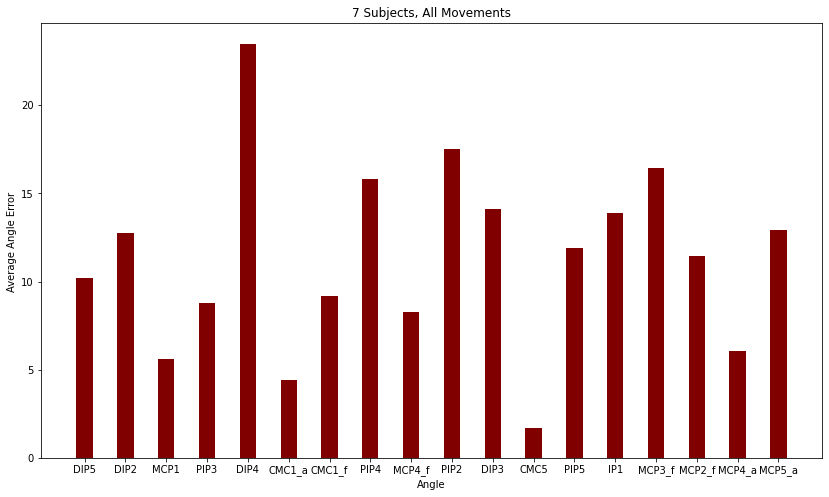

In [139]:
Error.to_csv('error_test1.csv')   

print(Error.mean())
fig = plt.figure(figsize=(14, 8))
 
# creating the bar plot
plt.bar(columns, Error.mean(), color ='maroon',
        width = 0.4)
 
plt.xlabel("Angle")
plt.ylabel("Average Angle Error ")
plt.title("7 Subjects, All Movements")
plt.show()
